# Simulation of RCT EMS v2 - Weekday + Disaster

Want to graph:
 - Travel Times
 - Coverages

In [1]:
%matplotlib notebook

import pandas
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from sys import argv
import scipy.stats as stats
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np
from numpy import median, mean
from functools import reduce
from collections import Counter
from os import listdir
from os import system

import subprocess


# Execute the Simulator
## Print the results

In [2]:
commands = [
    'python3.7 run.py configurations/exp-scenarios/tj-disaster-best-travel.yaml'
]

for c in commands:
    print(c)
    if system(c) != 0: 
        raise Exception("Failed.")
    else:
        print('Succeeded')


python3.7 run.py configurations/exp-scenarios/tj-disaster-best-travel.yaml
Succeeded


In [3]:
results = 'results/tj-disaster-best-travel/'
csvs = []
for f in listdir(results):
    
    path = results + f
    print(path)
    p = pandas.read_csv(path)
    csvs.append(p)


results/tj-disaster-best-travel/chosen_hospitals.csv
results/tj-disaster-best-travel/processed_cases.csv
results/tj-disaster-best-travel/metrics.csv
results/tj-disaster-best-travel/chosen_ambulances.csv
results/tj-disaster-best-travel/chosen_bases.csv


In [4]:
# csvs[0]

In [5]:
# csvs[1]

In [6]:
# csvs[2]

In [7]:
# csvs[3]

In [8]:
# csvs[4]

# Want to see number of events per hour.

In [9]:
cases = csvs[1]
dates = [datetime.strptime(arr[1], '%Y-%m-%d %H:%M:%S.%f').replace(
minute=0, second=0, microsecond=0) for arr in cases.values]


In [10]:
# matplotlib does not play well with datetimes

first = dates[0]
deltas = [(date-first).total_seconds()/3600 for date in dates]


In [11]:
c = Counter(deltas)
sum(c.values())

100

<IPython.core.display.Javascript object>


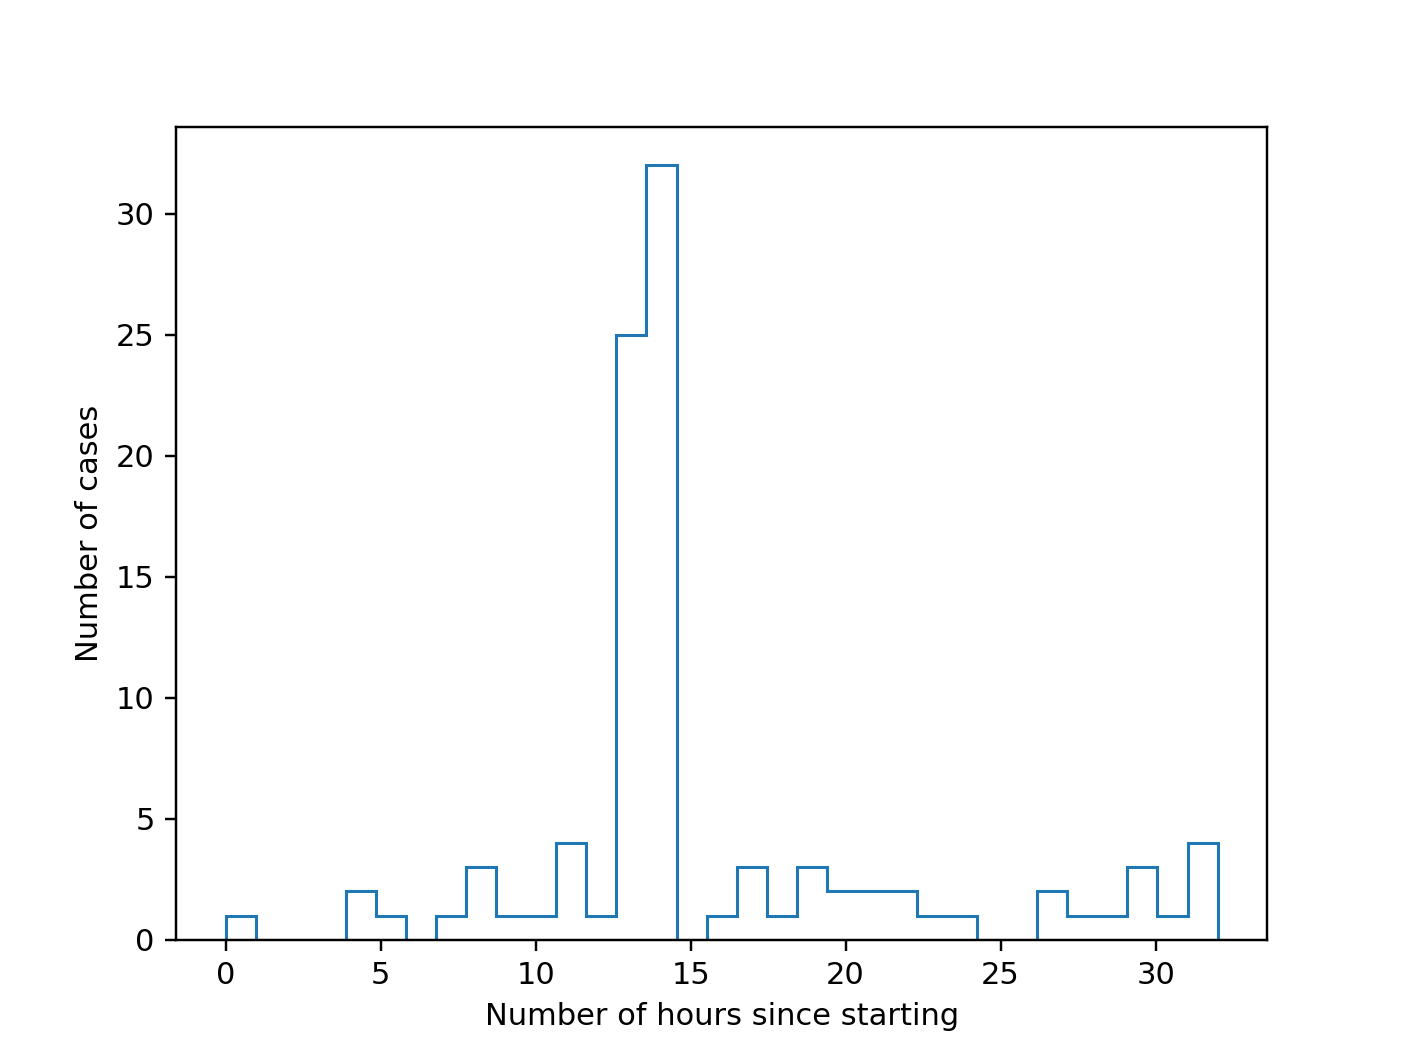

<IPython.core.display.Javascript object>


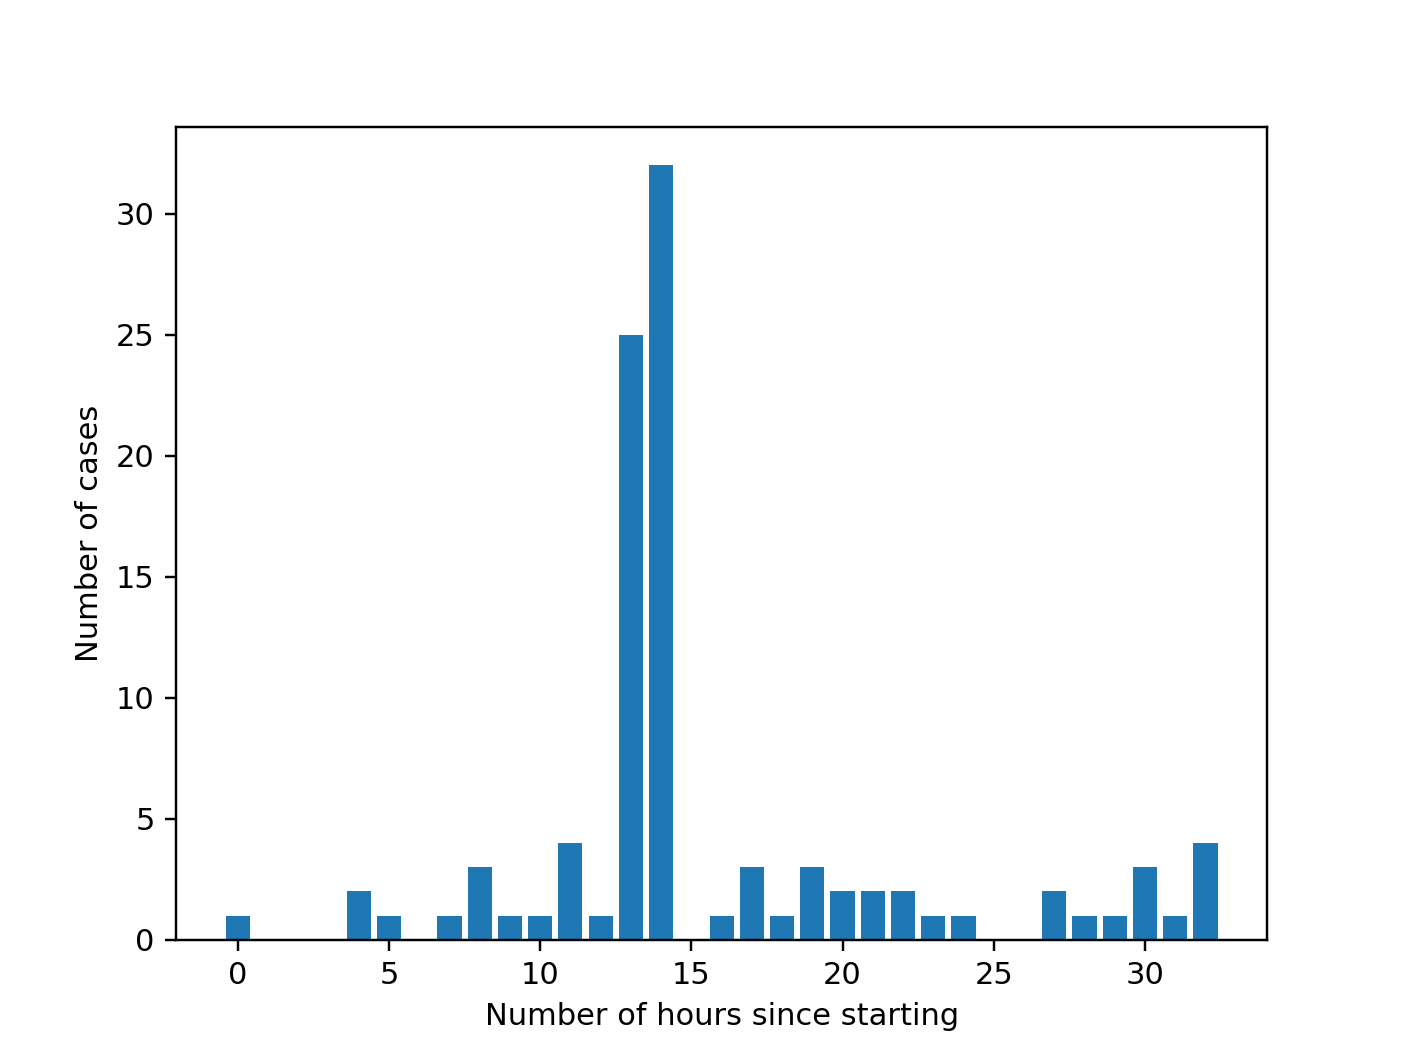

In [12]:
l = list(deltas)

plt.figure("Histogram: The number of cases per hour")
ys, xs, patches = plt.hist(deltas, bins=int((max(deltas)+1)/1), histtype='step')

plt.xlabel("Number of hours since starting"); plt.ylabel('Number of cases')
# plt.ylim(0,10)

plt.show()
ys = np.append(ys, [0])

plt.figure("Bar graph: The number of cases per hour")
plt.bar(c.keys(), c.values())

plt.xlabel("Number of hours since starting"); plt.ylabel('Number of cases')
# plt.ylim(0,10)

plt.show()


<IPython.core.display.Javascript object>


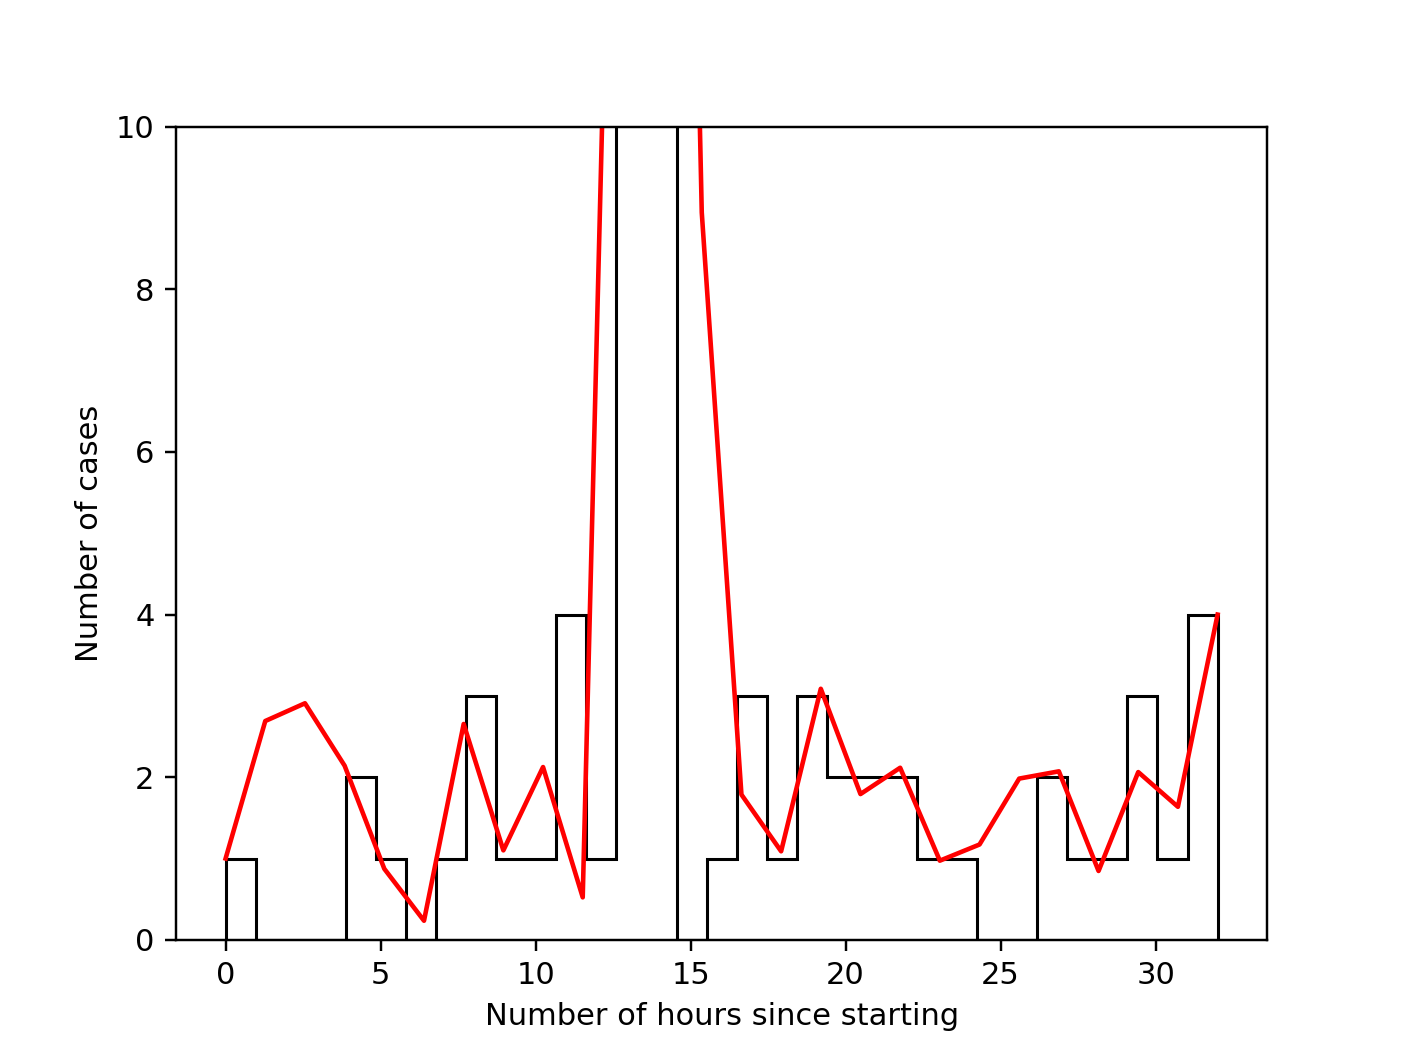

In [13]:
# Smoothed the original
smooth_xs = np.linspace(int(min(c.keys())), int(max(c.keys())), len(c.keys()))

spl = make_interp_spline(list(c.keys()), list(c.values()), k=3)
smooth_ys = spl(smooth_xs)

# plt.figure("This is the curve you were looking for.")
# plt.plot(smooth_xs, smooth_ys,)
# plt.show()

plt.figure("overlay")
plt.hist(deltas, bins=int((max(deltas)+1)), histtype='step', color='black')
plt.xlabel("Number of hours since starting"); plt.ylabel('Number of cases')
plt.ylim(0,10)
plt.plot(smooth_xs, smooth_ys, '-', color='red')

plt.show()


<IPython.core.display.Javascript object>


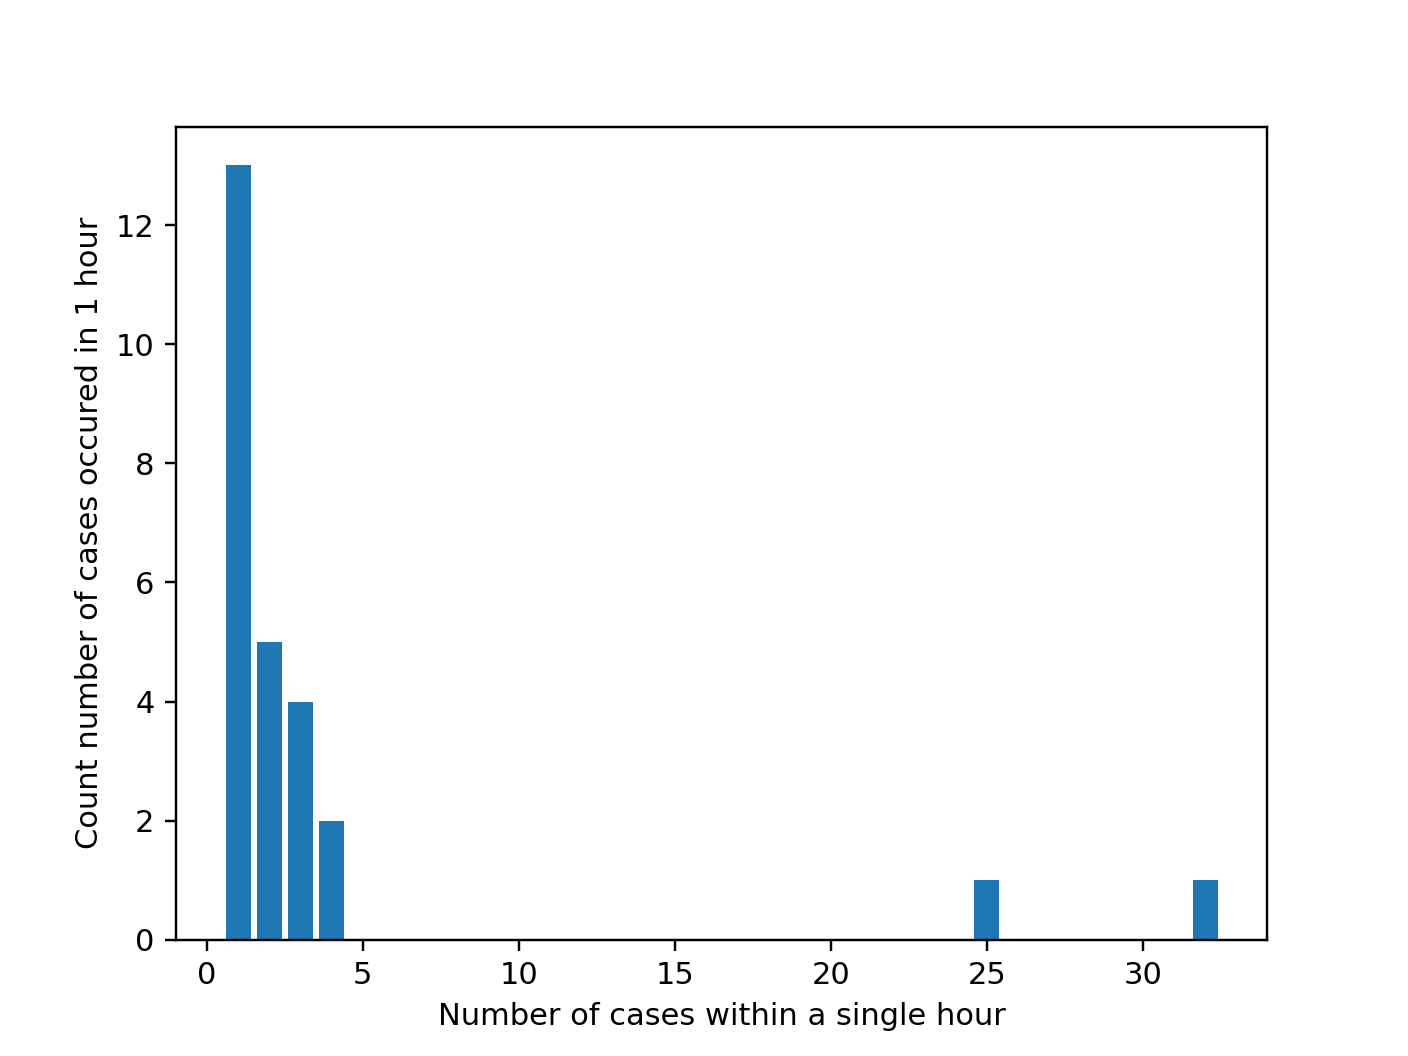

In [14]:
# I want to know the number of times each count per hour occurred. 

hours_counted = Counter(list(c.values()))

plt.figure('Number of times each number of cases per hour occurred')
plt.bar(hours_counted.keys(), hours_counted.values())

plt.xlabel('Number of cases within a single hour')
plt.ylabel('Count number of cases occured in 1 hour')

plt.show()

# Want to see the number of cases that have been reached within r1 and r2

In [15]:
# to incident durations
durations = [pandas.to_timedelta(array[7]) for array in  cases.values]
r1 = timedelta(minutes=10)
r2 = timedelta(minutes=14)

In [16]:
times = {
    'lt_r1' : list(filter(lambda t: t <  r1, durations)),
    'lt_r2' : list(filter(lambda t: t <  r2 and t >= r1, durations)),
    'beyond': list(filter(lambda t: t >= r2, durations)),
}

counts = {k:len(v) for k,v in times.items()}
counts

{'lt_r1': 36, 'lt_r2': 25, 'beyond': 39}

<IPython.core.display.Javascript object>


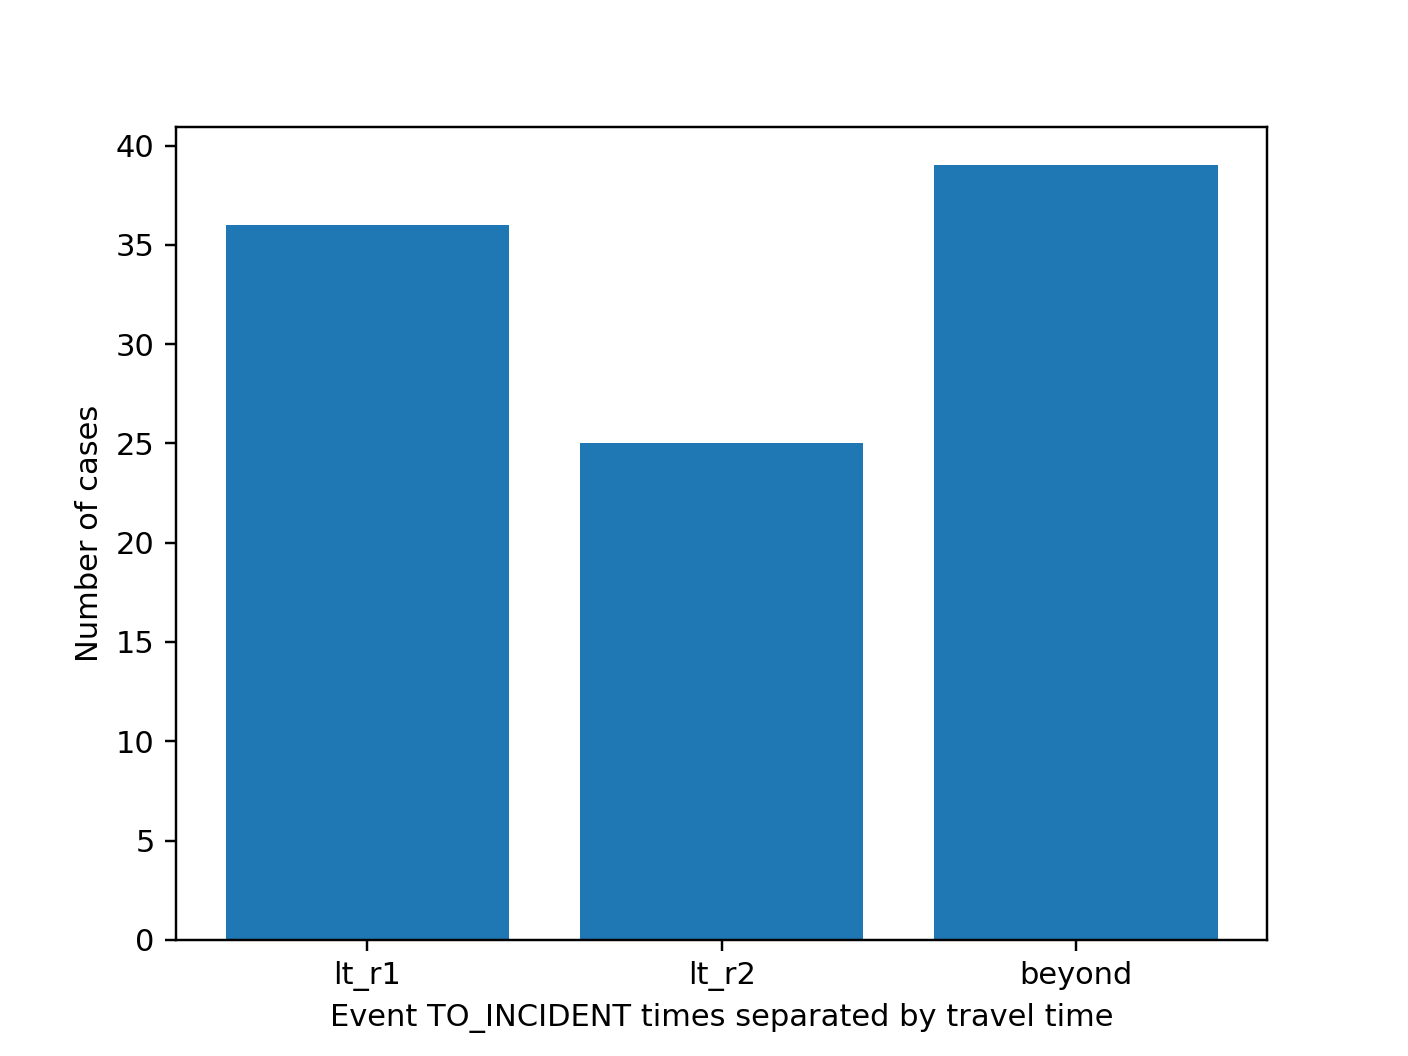

In [17]:
plt.figure("Travel times for the TO_INCIDENT events ")

plt.bar(counts.keys(), counts.values())
plt.xlabel("Event TO_INCIDENT times separated by travel time"); plt.ylabel('Number of cases')
plt.show()

# Want to plot the histogram for the coverage

True


<IPython.core.display.Javascript object>


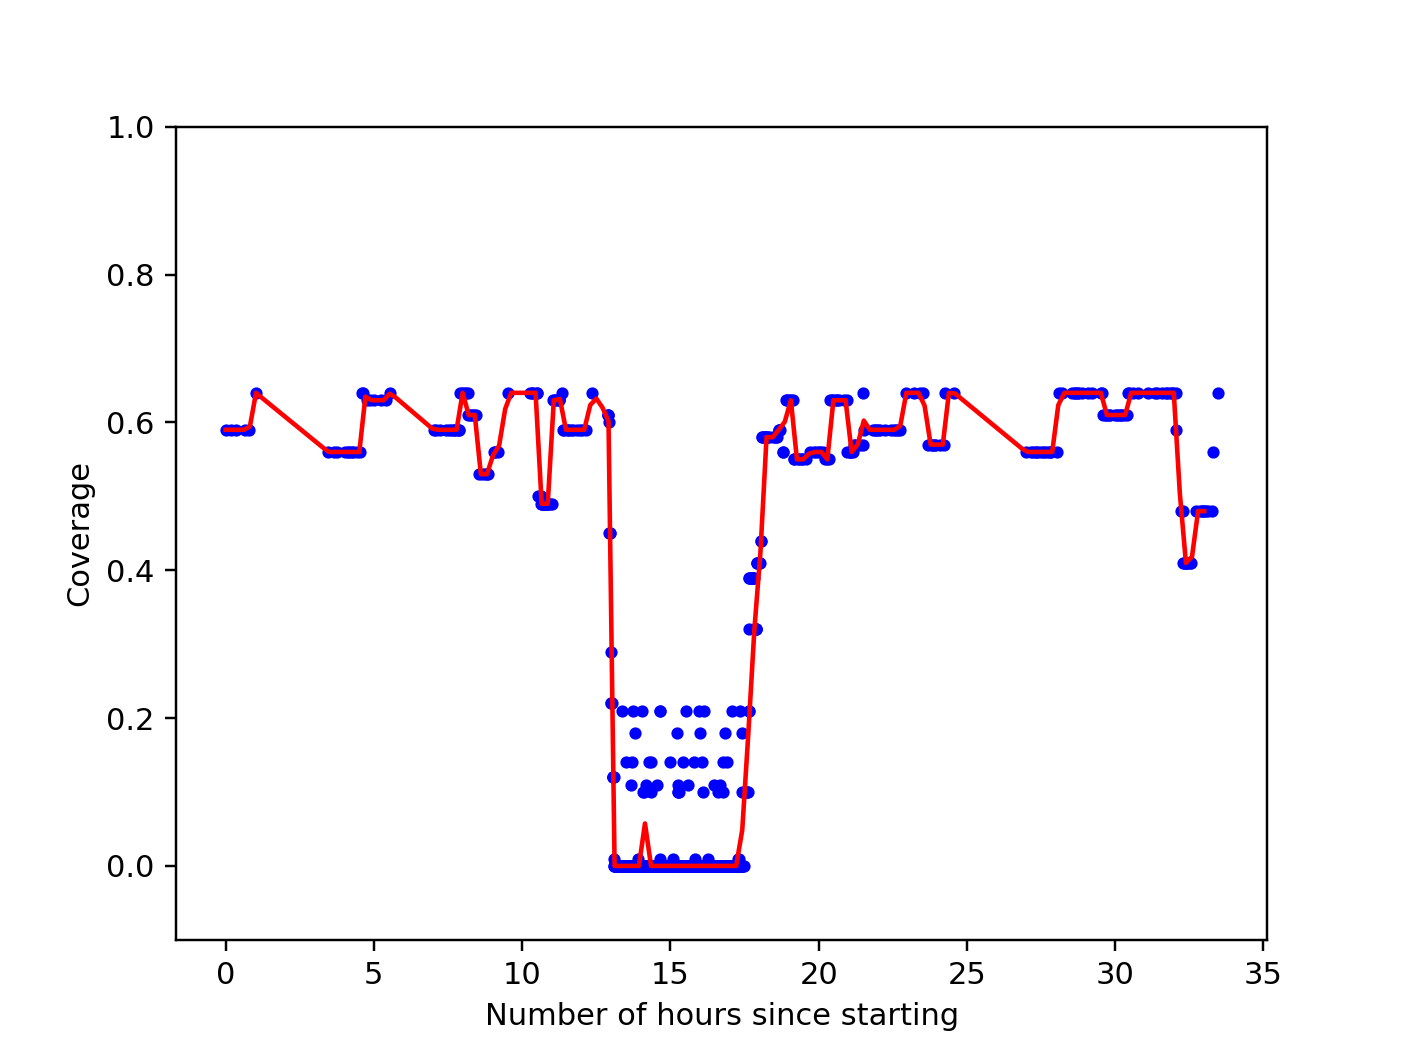

In [18]:
metrics = csvs[2]
coverages = [(pandas.to_datetime(arr[0]), float(arr[1])) for arr in metrics.values]
coverages.sort()

# print(coverages)

xs = [cov[0] for cov in coverages]
ys = [cov[1] for cov in coverages]

# list(map(print, xs))
# list(map(print, ys))

first = xs[0]
xs = [(date-first).total_seconds()/3600 for date in xs]

print(all([xs[i] <= xs[i+1] for i in range(len(xs)-1)]))

# Smoothed the original
smooth_xs = np.linspace(int(min(xs)), int(max(xs)), len(xs)//4)

spl = make_interp_spline(xs, ys, k=1)
smooth_ys = spl(smooth_xs)


plt.figure("Coverages over time ")
plt.ylim(-0.1, 1.0)
plt.xlabel("Number of hours since starting"); plt.ylabel('Coverage')

plt.plot(xs, ys, 'b.' )
plt.plot(smooth_xs, smooth_ys, '-', color='red')

plt.show()